## Multiple Linear Regression

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
%matplotlib inline
print("imported")

imported


#### Data Loading

In [9]:
df = pd.read_csv("../data/house_sales.csv")

In [10]:
df.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
0,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
1,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
2,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
3,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
4,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


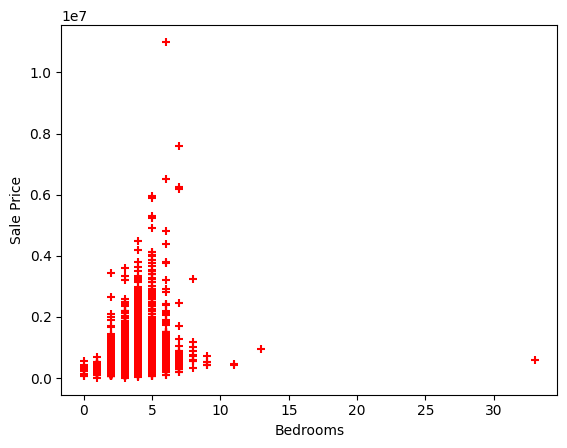

In [31]:
%matplotlib inline
plt.xlabel('Bedrooms')
plt.ylabel('Sale Price')
plt.scatter(df.Bedrooms,df.SalePrice,color='red',marker='+')

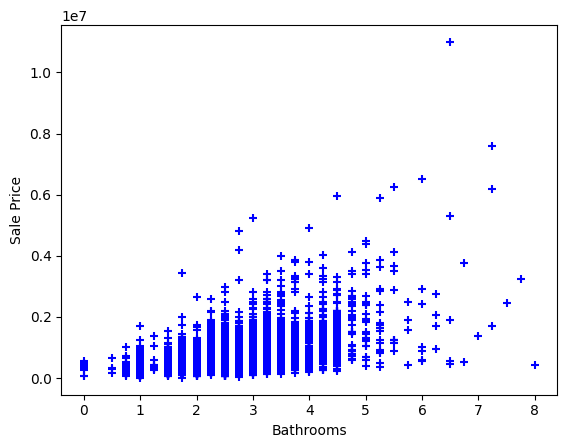

In [32]:
%matplotlib inline
plt.xlabel('Bathrooms')
plt.ylabel('Sale Price')
plt.scatter(df.Bathrooms,df.SalePrice,color='blue',marker='+')

#### Define target and features

In [18]:
target = "SalePrice"  # or use "AdjSalePrice" depending on your preference
features = ["Bathrooms", "Bedrooms"]

# Prepare the features and target for regression
X = df[features]  # Features
y = df[target]    # Target

#### Split the data into training and testing

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Create a LinearRegression model

In [22]:
# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using metrics like Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# You can also print the model coefficients to understand the impact of each feature
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Mean Squared Error: 95138743276.80493
R-squared: 0.28378253418165766
Coefficients: [223541.82114599  13294.10943747]
Intercept: -23577.421985231922


In [24]:
# New data for prediction 
new_data = {
    "Bathrooms": [3.5, 2.0, 4.0],  
    "Bedrooms": [4, 3, 5]          
}

# Create a DataFrame for the new data
new_df = pd.DataFrame(new_data)

# Use the trained model to make predictions
predictions = model.predict(new_df)

# Display the predictions (SalePrice predictions)
print(predictions)


[811995.3897756  463388.54861915 937060.40978606]
